# Classify possums population using k-Nearest Neighbors (kNN)

Data From : https://www.openintro.org/data/index.php?data=possum.



## References

1. https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6
2. https://towardsdatascience.com/k-nearest-neighbors-knn-how-to-make-quality-predictions-with-supervised-learning-d5d2f326c3c2
3.https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
4.https://medium.com/analytics-vidhya/beginners-guide-to-k-nearest-neighbors-pipelines-in-classification-704b87f534e2
5.https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
6.https://www.researchgate.net/publication/2948052_KNN_Model-Based_Approach_in_Classification

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier




### Read in data

In [2]:
df = pd.read_csv('possum.csv')

In [3]:
df.sample(10)

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
18,1,Vic,f,5.0,94.4,55.4,90.5,35.0
57,4,other,m,3.0,94.5,64.2,91.0,39.0
98,7,other,f,3.0,93.3,56.2,86.5,38.5
14,1,Vic,m,5.0,92.9,57.6,85.5,34.0
85,6,other,f,3.0,88.2,53.2,86.5,38.5
80,6,other,m,3.0,90.6,56.0,85.5,38.0
65,5,other,f,3.0,90.4,55.8,86.0,36.5
51,3,other,m,6.0,97.6,61.0,93.5,40.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
70,5,other,m,6.0,92.8,57.6,90.0,40.0


In [4]:
df.shape

(104, 8)

#### Label Encode the Categorical features and add it back to the dataframe under new colums 

In [5]:
df['sex_code'] = np.where(df.sex=='m',0,1)

In [6]:
df['pop_coded'] = np.where(df['pop']=='Vic',0,1)

In [7]:
df.sample(12)

,site,pop,sex,age,head_l,skull_w,total_l,tail_l,sex_code,pop_coded
39,2,Vic,f,3.0,91.0,55.0,84.5,36.0,1,0
44,2,Vic,m,3.0,90.7,55.9,81.0,34.0,0,0
32,1,Vic,m,3.0,91.4,54.6,89.0,37.0,0,0
51,3,other,m,6.0,97.6,61.0,93.5,40.0,0,1
35,2,Vic,m,7.0,93.3,59.3,88.0,35.0,0,0
76,6,other,m,6.0,93.6,56.2,84.0,36.0,0,1
69,5,other,f,7.0,91.9,56.4,87.0,38.0,1,1
59,4,other,f,2.0,91.3,57.7,88.0,39.0,1,1
48,3,other,m,4.0,95.4,59.2,85.0,37.0,0,1
63,5,other,f,3.0,96.9,56.5,89.5,38.5,1,1


In [8]:
df.isnull().sum()

site         0
pop          0
sex          0
age          2
head_l       0
skull_w      0
total_l      0
tail_l       0
sex_code     0
pop_coded    0
dtype: int64

### We use Simple Imputer to replace missing data with mean 

In [9]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan, fill_value=0)
imputer = imputer.fit(df[['age']])
df[['age']] = imputer.transform(df[['age']])
df

,site,pop,sex,age,head_l,skull_w,total_l,tail_l,sex_code,pop_coded
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,0,0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,1,0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,1,0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,1,0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,1,0
...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,0,1
100,7,other,m,1.0,88.6,54.7,82.5,39.0,0,1
101,7,other,f,6.0,92.4,55.0,89.0,38.0,1,1
102,7,other,m,4.0,91.5,55.2,82.5,36.5,0,1


### Define Y Target and X features 

In [10]:
X = df.drop(columns = ['pop','site','pop_coded','sex'])
y = df['pop_coded']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
X_train.shape

(78, 6)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


Finding the Optimal number of K neighbours to see if we can further improve the model 

In [20]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

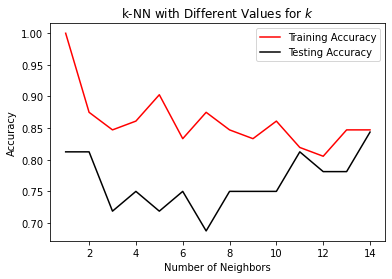

In [21]:
# Create possible values for k
neighbors = np.arange(1, 15)

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=4)

plot_complexity_curve(neighbors, KNeighborsClassifier, 
                    X_train, X_test, y_train, y_test)

Run the Model with Optimal Neighbor size = 14

In [22]:
knn1 = KNeighborsClassifier(n_neighbors=14)

In [23]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

Make predictions

In [24]:
y_pred1 = knn1.predict(X_test)

Evaluate predictions

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.84375


Precision, recall, and F score all look good with this model:

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[13  3]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.82      0.88      0.85        16

    accuracy                           0.84        32
   macro avg       0.85      0.84      0.84        32
weighted avg       0.85      0.84      0.84        32



In [27]:
from sklearn.metrics import zero_one_loss
zero_one_loss(y_test, y_pred1)
 





0.15625